# XGBoost

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 CPU 환경에서 빠르게 학습 가능

In [35]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 3.1 MB/s eta 0:00:00


In [25]:
from sklearn.datasets import load_iris, load_breast_cancer, load_boston, load_wine, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])


## 파이썬 기반 XGBoost

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=X_train, label= y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)


In [3]:
params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss',
    'early_stopping' : 100}
num_rounds=400

In [5]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds=100, evals=evals)

[14:35:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[0]	train-logloss:0.60944	eval-logloss:0.61010
[1]	train-logloss:0.54047	eval-logloss:0.54074
[2]	train-logloss:0.48211	eval-logloss:0.48490
[3]	train-logloss:0.43365	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.35372	eval-logloss:0.36211
[6]	train-logloss:0.32223	eval-logloss:0.32996
[7]	train-logloss:0.29292	eval-logloss:0.30179
[8]	train-logloss:0.26731	eval-logloss:0.27801
[9]	train-logloss:0.24409	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.24037
[11]	train-logloss:0.20807	eval-logloss:0.22271
[12]	train-logloss:0.19177	eval-logloss:0.20795
[13]	train-logloss:0.17746	eval-logloss:0.19531
[14]	train-logloss:0.16408	eval-logloss:0.18460
[15]	train-logloss:0.15250	eval-logloss:0.17183
[16]	train-logloss:0.14198	eval-loglos

In [6]:
import numpy as np
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10],3))

[1.    0.999 0.001 0.995 0.001 0.989 0.995 0.998 0.966 0.795]


In [7]:
preds = [1 if x>0.5 else 0 for x in predicts]
print(preds[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


In [8]:
print(f'정확도 : {accuracy_score(y_test, preds)}')
print(f'정밀도 : {precision_score(y_test, preds)}')
print(f'재현율 : {recall_score(y_test, preds)}')
      

정확도 : 0.9736842105263158
정밀도 : 0.972972972972973
재현율 : 0.9863013698630136


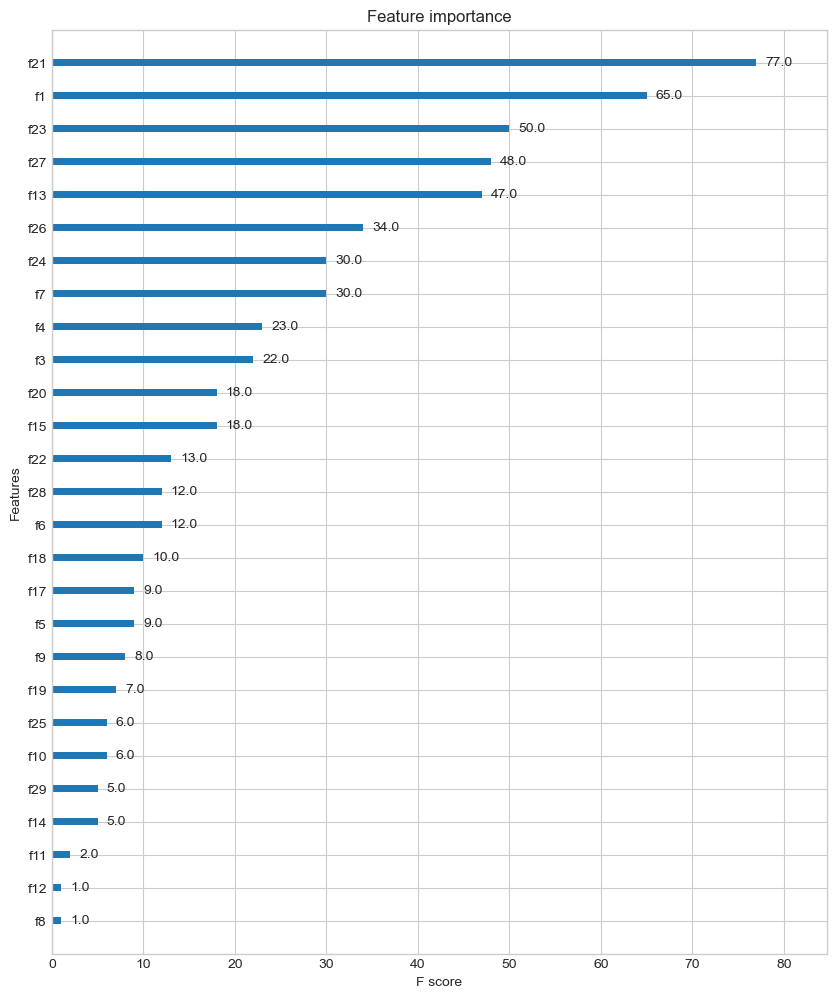

In [9]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax);

In [10]:
dot_data = xgb.to_graphviz(xgb_model)
graph = graphviz.Source(dot_data)
graph

AttributeError: 'Source' object has no attribute 'splitlines'

## XGBClassifier

### 붓꽃 데이터

In [17]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [18]:
xgbc = XGBClassifier(n_estimators = 400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [21]:
cross_val = cross_validate(
    estimator=xgbc,
    X=iris.data, y=iris.target,
    cv=5
)

print(f"avg fit time : {cross_val['fit_time'].mean()} (+/- {cross_val['fit_time'].std()})")
print(f"avg score time : {cross_val['score_time'].mean()} (+/- {cross_val['score_time'].std()})")
print(f"avg test score : {cross_val['test_score'].mean()} (+/- {cross_val['test_score'].std()})")

avg fit time : 0.1799182891845703 (+/- 0.004802658060100165)
avg score time : 0.0019878864288330076 (+/- 1.3568007318167927e-05)
avg test score : 0.96 (+/- 0.024944382578492935)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

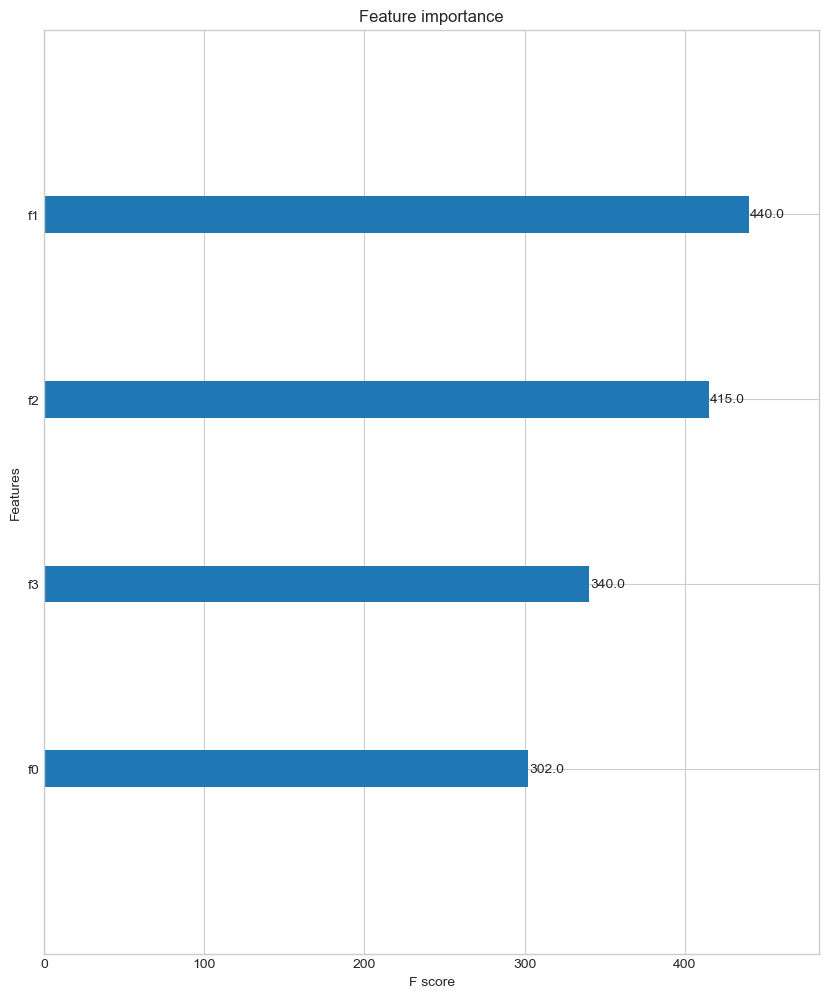

In [22]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc, ax=ax)

In [26]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

AttributeError: 'Source' object has no attribute 'splitlines'

### 와인 데이터

### 유방암 데이터

## XGBRegressor

### 보스턴 데이터

In [28]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=123)

In [30]:
xgbr = XGBRegressor(n_estimators = 400, learning_rate=0.1, max_depth=3)
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)

In [31]:
cross_val = cross_validate(
    estimator=xgbr,
    X=boston.data, y=boston.target,
    cv=5
)

print(f"avg fit time : {cross_val['fit_time'].mean()} (+/- {cross_val['fit_time'].std()})")
print(f"avg score time : {cross_val['score_time'].mean()} (+/- {cross_val['score_time'].std()})")
print(f"avg test score : {cross_val['test_score'].mean()} (+/- {cross_val['test_score'].std()})")

avg fit time : 0.17055873870849608 (+/- 0.003421605573611184)
avg score time : 0.0025165557861328127 (+/- 0.0004347854811816369)
avg test score : 0.6884390736705599 (+/- 0.1649974770303876)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

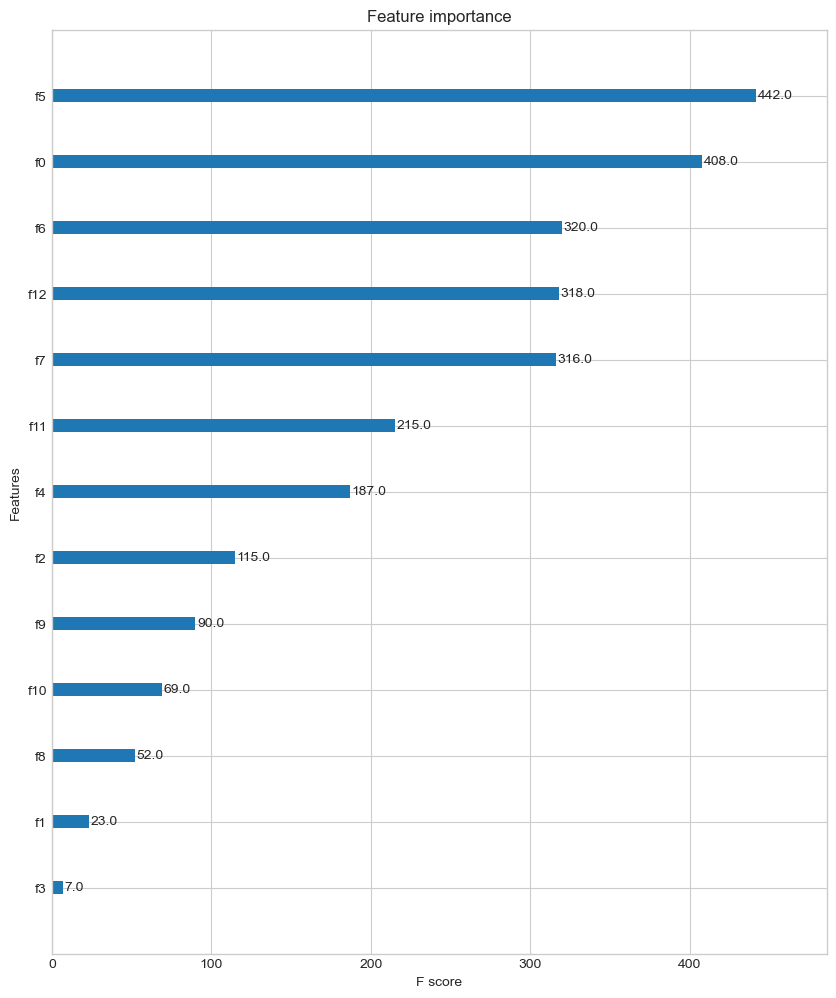

In [32]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbr, ax=ax)

In [33]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

AttributeError: 'Source' object has no attribute 'splitlines'

### 당뇨병 데이터

# LightGBM

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적 분할

In [39]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

## LGBMClassifier

### 붓꽃 데이터

In [41]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [43]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds=lgbmc.predict(X_test)

[1]	valid_0's multi_logloss: 0.95847
[2]	valid_0's multi_logloss: 0.832184
[3]	valid_0's multi_logloss: 0.731164
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571726
[6]	valid_0's multi_logloss: 0.507286
[7]	valid_0's multi_logloss: 0.454933
[8]	valid_0's multi_logloss: 0.410205
[9]	valid_0's multi_logloss: 0.372194
[10]	valid_0's multi_logloss: 0.333919
[11]	valid_0's multi_logloss: 0.310212
[12]	valid_0's multi_logloss: 0.282326
[13]	valid_0's multi_logloss: 0.257165
[14]	valid_0's multi_logloss: 0.240836
[15]	valid_0's multi_logloss: 0.225383
[16]	valid_0's multi_logloss: 0.211583
[17]	valid_0's multi_logloss: 0.199289
[18]	valid_0's multi_logloss: 0.186269
[19]	valid_0's multi_logloss: 0.171556
[20]	valid_0's multi_logloss: 0.168245
[21]	valid_0's multi_logloss: 0.161065
[22]	valid_0's multi_logloss: 0.151371
[23]	valid_0's multi_logloss: 0.148081
[24]	valid_0's multi_logloss: 0.143843
[25]	valid_0's multi_logloss: 0.140169
[26]	valid_0's multi_logloss: 0.138

C:\Users\User\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [44]:
cross_val = cross_validate(
    estimator=lgbmc,
    X=iris.data, y=iris.target,
    cv=5
)

print(f"avg fit time : {cross_val['fit_time'].mean()} (+/- {cross_val['fit_time'].std()})")
print(f"avg score time : {cross_val['score_time'].mean()} (+/- {cross_val['score_time'].std()})")
print(f"avg test score : {cross_val['test_score'].mean()} (+/- {cross_val['test_score'].std()})")

avg fit time : 0.10505175590515137 (+/- 0.009033702941929737)
avg score time : 0.0010030746459960937 (+/- 1.0569663272416848e-05)
avg test score : 0.9600000000000002 (+/- 0.04898979485566355)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

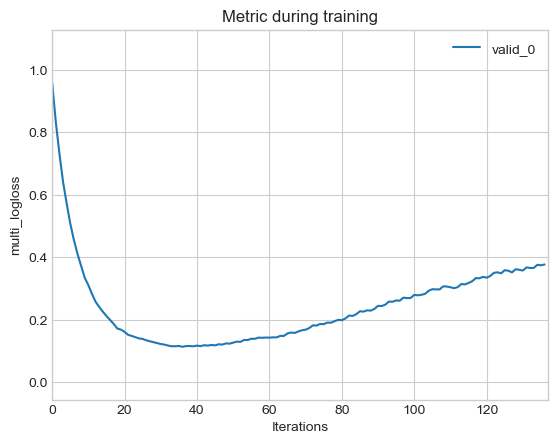

In [45]:
plot_metric(lgbmc)

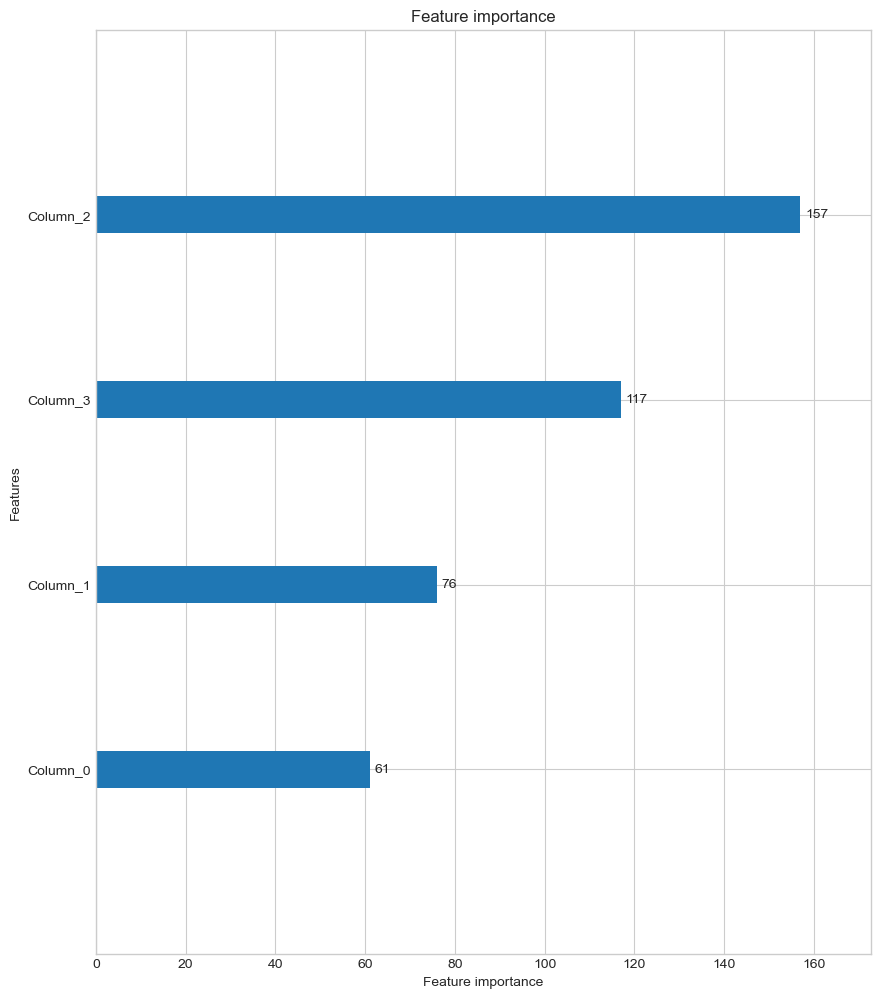

In [48]:
plot_importance(lgbmc, figsize=(10,12));

### 와인 데이터

### 유방암 데이터

## LGBMRegressor

### 보스턴 데이터

In [49]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=123)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [58]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds=lgbmr.predict(X_test)

[1]	valid_0's l2: 71.4897
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	valid_0's l2: 22.6387
[37]	valid_0's l2: 22.4443
[38]	valid_0's l

C:\Users\User\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [52]:
cross_val = cross_validate(
    estimator=lgbmr,
    X=boston.data, y=boston.target,
    cv=5
)

print(f"avg fit time : {cross_val['fit_time'].mean()} (+/- {cross_val['fit_time'].std()})")
print(f"avg score time : {cross_val['score_time'].mean()} (+/- {cross_val['score_time'].std()})")
print(f"avg test score : {cross_val['test_score'].mean()} (+/- {cross_val['test_score'].std()})")

avg fit time : 0.14595408439636232 (+/- 0.012486839705048014)
avg score time : 0.0018067359924316406 (+/- 0.0007647613587064332)
avg test score : 0.5692468252571979 (+/- 0.2956636613238221)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

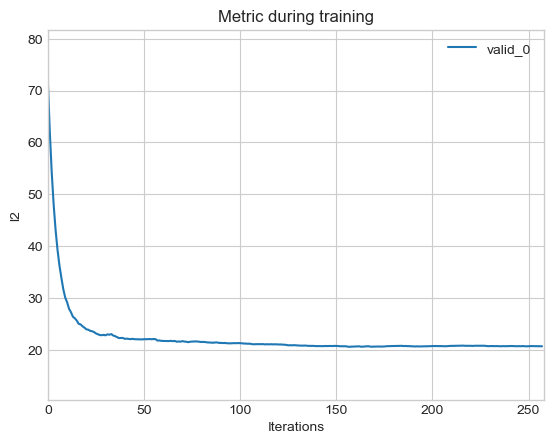

In [55]:
plot_metric(lgbmr)

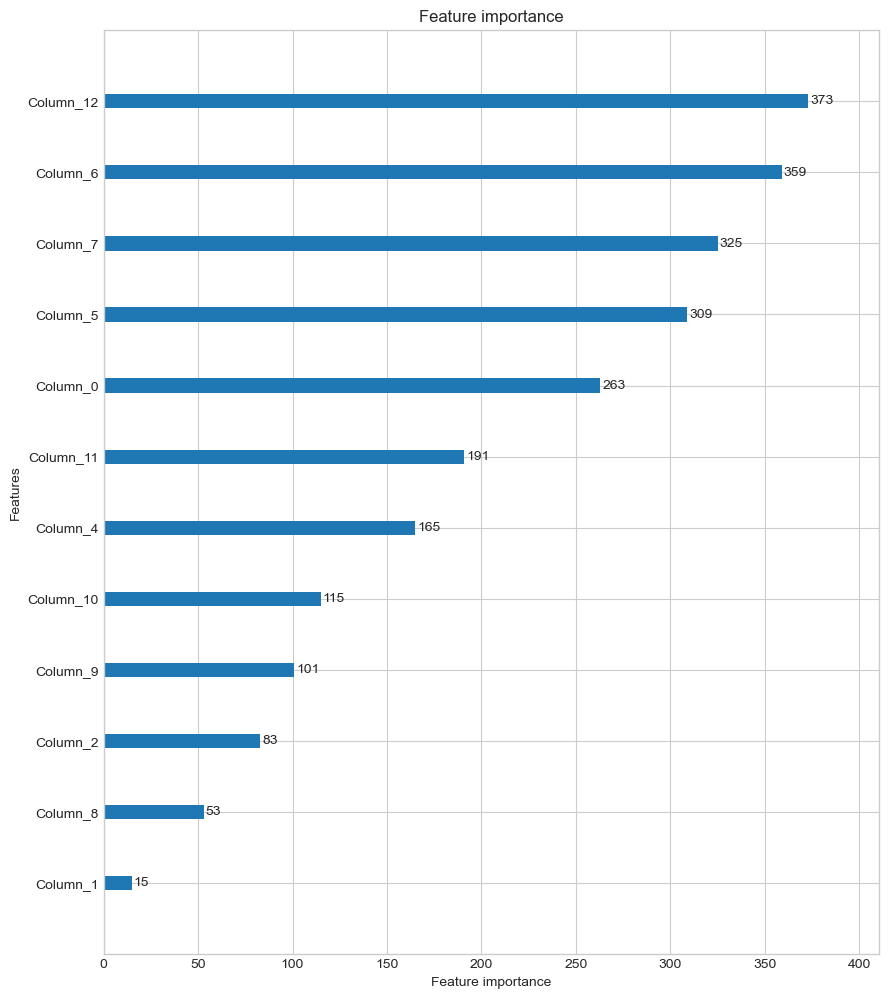

In [56]:
plot_importance(lgbmr, figsize=(10,12));

### 당뇨병 데이터